### Series y DataFrames

Estas son las dos estructuras básicas de Pandas que utilizaremos. Las `series` son equivalentes a un array de una dimensión, es decir como las columnas de los dataframes

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
pd.Series(['Buenos Aires', 'Rosario', 'Cordoba'])

0    Buenos Aires
1         Rosario
2         Cordoba
dtype: object

Los objetos de DataFrame pueden crearse al enviar un dict que asigne nombres de columnas de string a sus Series correspondientes. Si las Series no coinciden con la longitud, los valores que falten se completan con valores NA/NaN especiales. Ejemplo:

In [ ]:
# Definimos columnas usando series
states     = pd.Series(['Buenos Aires', 'Santa Fe', 'Cordoba'])
population = pd.Series([3075646, 3536418, 3760450])

provincias = pd.DataFrame({ 'Nombre de prov.': states, 'Poblacion': population })
provincias

,Nombre de prov.,Poblacion
0,Buenos Aires,3075646
1,Santa Fe,3536418
2,Cordoba,3760450


También las podemos crear a partir de una lista de listas y pasarle los nombres de las filas (Index) y columnas.

In [ ]:
df = pd.DataFrame([[1,2],[3,4],[5,6]],['Fila1','Fila2','Fila3'],['Col1','Col2'])
df

,Col1,Col2
Fila1,1,2
Fila2,3,4
Fila3,5,6


Si por alguna razón queremos tener un índice nuevo podemos hacerlo con el método reset_index que nos convertirá el indice en una nueva columna

In [ ]:
# Sin cambiar el indice original
df.reset_index()

,index,Col1,Col2
0,Fila1,1,2
1,Fila2,3,4
2,Fila3,5,6


In [ ]:
# Veamos que no lo cambio al original
print(df.index)

# Si lo queremos cambiar le podmos pasar el parámetro inplace
#df.reset_index(inplace=True)

Index(['Fila1', 'Fila2', 'Fila3'], dtype='object')


Existen luego múltiples maneras de acceder a cada lugar del dataframe o extraer columnas o filas. Veamos algunos ejemplos y traten de predecir que va a devolver cada uno de los comandos:



In [ ]:
# Utilizando el nombre de la columna
#df['Col1']

# Utilizando el nombre de la columna opcion 2
df.Col1

Fila1    1
Fila2    3
Fila3    5
Name: Col1, dtype: int64

In [ ]:
# Indexing con iloc

df = pd.DataFrame([[1,2],[3,4],[5,6]],['Fila1','Fila2','Fila3'],['Col1','Col2'])

# Por numero con el .iloc - formato filas,columnas

# Primera fila, segunda columna
#df.iloc[1,0]

# Segunda fila, todas las columnas
df.iloc[:,1]

Fila1    2
Fila2    4
Fila3    6
Name: Col2, dtype: int64

In [ ]:
# Como les parece que accederían a las dos primeras filas y dos primeras columnas?
# COMPLETAR
#df.iloc[0,0:2,2]
df.iloc[0:2,0:2]
df.iloc[0:2,:]
#df.iloc[0;2:0;2]
#df.iloc[0:1,0:1]
#df.iloc[:,0,:,1]
df.iloc[:2,:]

,Col1,Col2
Fila1,1,2
Fila2,3,4


Podemos crear, eliminar y operar con las columnas de manera bastante sencilla.

In [ ]:
# Además podemos crear columnas que no existan
provincias['Superficie(km2)'] = [205.9, 164707.8 , 133249.1]
provincias

,Nombre de prov.,Poblacion,Superficie(km2)
0,Buenos Aires,3075646,205.9
1,Santa Fe,3536418,164707.8
2,Cordoba,3760450,133249.1


In [ ]:
# Podemos operar con columnas lugar a lugar
provincias['Densidad'] = provincias['Poblacion'] / provincias['Superficie(km2)']
provincias

,Nombre de prov.,Poblacion,Superficie(km2),Densidad
0,Buenos Aires,3075646,205.9,14937.571637
1,Santa Fe,3536418,164707.8,21.470859
2,Cordoba,3760450,133249.1,28.221204


Asi también usando drop e indicando el eje podemos "dropear" o eliminar columnas o filas.

In [ ]:
# Eliminando una columna o una fila

# df.drop('NombreDeLaColumnaAEliminar', axis=1) # axis = 0 para filas, axis = 1 para columnas
df.drop('Fila2', axis = 0) # axis = 0 para filas

,Col1,Col2
Fila1,1,2
Fila3,5,6


In [ ]:
# Veamos cómo queda
df

,Col1,Col2
Fila1,1,2
Fila2,3,4
Fila3,5,6


In [ ]:
# Ooopss se ve igual?
# Ojo: Si no ponemos el parametro inplace=True los cambios no se van a guardar
df.drop('Fila2', axis = 0, inplace = True) # axis = 0 para filas

In [ ]:
df

,Col1,Col2
Fila1,1,2
Fila3,5,6


### Boolean indexing y masking

Podemos evaluar y extraer distintas condiciones booleanas sobre el dataframe y quedarnos con el subconjunto que las cumple.

In [ ]:
# Podemos evaluar distintas condiciones sobre las columnas del dataframe
provincias['Superficie(km2)'] < 150000

0     True
1    False
2     True
Name: Superficie(km2), dtype: bool

In [ ]:
# A la vez podemos extraer el subdataframe que cumple dichas condiciones
mascara_superficie = provincias['Superficie(km2)'] < 150000
provincias[mascara_superficie]

,Nombre de prov.,Poblacion,Superficie(km2),Densidad
0,Buenos Aires,3075646,205.9,14937.571637
2,Cordoba,3760450,133249.1,28.221204


In [ ]:
# O podemos hacerlo directamente
provincias[provincias['Superficie(km2)'] < 150000]

,Nombre de prov.,Poblacion,Superficie(km2),Densidad
0,Buenos Aires,3075646,205.9,14937.571637
2,Cordoba,3760450,133249.1,28.221204


Podemos utilizar mas de una condicion utilizando los conectores de pandas
* `&` en vez de `and`
* `|` en vez de `or`


In [ ]:
provincias[(provincias['Superficie(km2)'] < 150000) & (provincias['Densidad'] < 30)]

,Nombre de prov.,Poblacion,Superficie(km2),Densidad
2,Cordoba,3760450,133249.1,28.221204


Además existen otras funciones que nos devuelven true o false y nos permiten extraer condiciones un poco mas elaboradas como por ejemplo:

* `isin`: chequear si la columna contiene un valor perteneciente a una lista determinada.
* `isnan`: chequear si la columna contiene un valor NaN.

In [ ]:
provincias[provincias['Nombre de prov.'].isin(['Cordoba', 'San Luis', 'Santa Fe'])]

,Nombre de prov.,Poblacion,Superficie(km2),Densidad
1,Santa Fe,3536418,164707.8,21.470859
2,Cordoba,3760450,133249.1,28.221204


### Group By

La función `groupby` es muy útil, nos permite dividir según categorias o valores el dataframe y aplicar distintas métricas por grupos y de esta manera crear tablas comparativas. Les recomendamos que miren la documentación al respecto: [tutorial](https://pandas.pydata.org/docs/user_guide/groupby.html), acá vamos a dar solo algunos ejemplos sencillos e iremos aprendiendo mas sobre esta herramienta a lo largo del curso.

In [ ]:
# Crearemos un dataset de juguete
df = pd.DataFrame(dict(Genero=['M', 'F', 'M', 'F','F',
                               'F', 'M', 'M', 'F','M'],
                       Provincia=['CBA','SFE', 'BA', 'BA', 'CBA',
                              'CABA', 'SFE', 'SFE', 'CBA', 'CABA'],
                       Edad=[19,29,17,63,38,
                             34,22,59,62,47],
                       Ingresos=[69200, 132500, 38400, 225500, 158750,
                                 78600, np.nan, 147000, 98600, 108250]))
df

,Genero,Provincia,Edad,Ingresos
0,M,CBA,19,69200.0
1,F,SFE,29,132500.0
2,M,BA,17,38400.0
3,F,BA,63,225500.0
4,F,CBA,38,158750.0
5,F,CABA,34,78600.0
6,M,SFE,22,NaN
7,M,SFE,59,147000.0
8,F,CBA,62,98600.0
9,M,CABA,47,108250.0


In [ ]:
# Pueden usar sus propias funciones y aplicarlas solo a filas (axis=0) o columnas (axis=1)
def mifun(fila):
  """
  Esto es un docstring! Sirve para describir que hacen nuestras funciones. En este caso armamos una funcion que toma una fila del dataframe y extrae
  las variables de nuestro interes y nos dice si un sujeto de nuestro dataframe tiene ingresos altos o bajos
  """
  ingresos = fila['Ingresos']
  provincia = fila['Provincia']
  if (provincia == 'CABA' and ingresos > 200000) or ingresos >150000:
    return 'Alto'
  elif (provincia == 'CABA' and ingresos < 80000) or ingresos < 50000:
    return 'Bajo'
  else:
    return 'Medio'

# Miren que paso con el valor faltante, ¿como lo corregirian?
df['Tipo de ingresos']=df.apply(mifun, axis=1)
df

,Genero,Provincia,Edad,Ingresos,Tipo de ingresos
0,M,CBA,19,69200.0,Medio
1,F,SFE,29,132500.0,Medio
2,M,BA,17,38400.0,Bajo
3,F,BA,63,225500.0,Alto
4,F,CBA,38,158750.0,Alto
5,F,CABA,34,78600.0,Bajo
6,M,SFE,22,NaN,Medio
7,M,SFE,59,147000.0,Medio
8,F,CBA,62,98600.0,Medio
9,M,CABA,47,108250.0,Medio


In [ ]:
# Podemos calcular medidas resumen por grupos para una columna
metrics = ['count', 'min', 'max', 'mean','std']
tabla1  = df.groupby(by='Tipo de ingresos').agg(metrics)
print(tabla1)

                  Edad                               Ingresos            \
                 count min max       mean        std    count       min   
Tipo de ingresos                                                          
Alto                 2  38  63  50.500000  17.677670        2  158750.0   
Bajo                 2  17  34  25.500000  12.020815        2   38400.0   
Medio                6  19  62  39.666667  18.864429        5   69200.0   

                                                    
                       max      mean           std  
Tipo de ingresos                                    
Alto              225500.0  192125.0  47199.377644  
Bajo               78600.0   58500.0  28425.692604  
Medio             147000.0  111110.0  30276.855847  


<ipython-input-8-0ec01fe7a9e1>:3: FutureWarning: ['Genero', 'Provincia'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  tabla1  = df.groupby(by='Tipo de ingresos').agg(metrics)


In [ ]:
# Podemos usar mas de una columna
tabla2 = df.groupby(['Genero','Provincia'])['Ingresos'].agg([min, max])
tabla2

min       max
Genero Provincia                    
F      BA         225500.0  225500.0
       CABA        78600.0   78600.0
       CBA         98600.0  158750.0
       SFE        132500.0  132500.0
M      BA          38400.0   38400.0
       CABA       108250.0  108250.0
       CBA         69200.0   69200.0
       SFE        147000.0  147000.0

In [ ]:
# Distintas medidas
tabla2 = df.groupby(['Genero','Provincia']).agg({'Ingresos': 'mean', 'Edad':'median'})
tabla2

Ingresos  Edad
Genero Provincia                
F      BA         225500.0  63.0
       CABA        78600.0  34.0
       CBA        128675.0  50.0
       SFE        132500.0  29.0
M      BA          38400.0  17.0
       CABA       108250.0  47.0
       CBA         69200.0  19.0
       SFE        147000.0  40.5

In [ ]:
# Podemos ponerle nombres
tabla2 = df.groupby(['Genero','Provincia']).agg(media_ingresos=('Ingresos','mean'), edad_mediana=('Edad','median'))
tabla2

media_ingresos  edad_mediana
Genero Provincia                              
F      BA               225500.0          63.0
       CABA              78600.0          34.0
       CBA              128675.0          50.0
       SFE              132500.0          29.0
M      BA                38400.0          17.0
       CABA             108250.0          47.0
       CBA               69200.0          19.0
       SFE              147000.0          40.5

In [ ]:
# Podemos tambien aplicar una transformación por grupo facilmente usando transform
df['Media por prov'] = df.groupby('Provincia')['Ingresos'].transform('mean')
df

,Genero,Provincia,Edad,Ingresos,Tipo de ingresos,Media por prov
0,M,CBA,19,69200.0,Medio,108850.0
1,F,SFE,29,132500.0,Medio,139750.0
2,M,BA,17,38400.0,Bajo,131950.0
3,F,BA,63,225500.0,Alto,131950.0
4,F,CBA,38,158750.0,Alto,108850.0
5,F,CABA,34,78600.0,Bajo,93425.0
6,M,SFE,22,NaN,Medio,139750.0
7,M,SFE,59,147000.0,Medio,139750.0
8,F,CBA,62,98600.0,Medio,108850.0
9,M,CABA,47,108250.0,Medio,93425.0


### Plots utilizando DataFrames en Pandas

Text(0.5, 0, 'Ingresos')

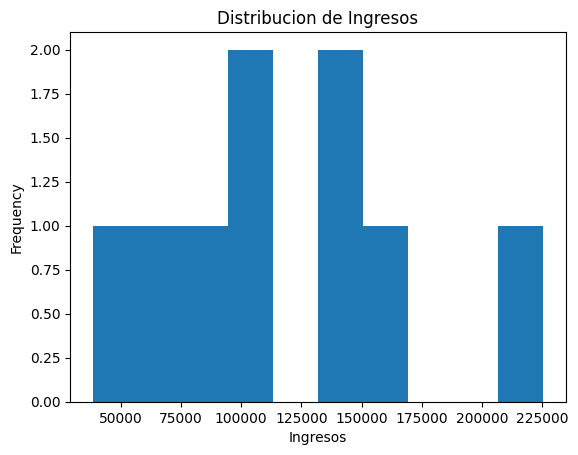

In [ ]:
import matplotlib.pyplot as pt

df['Ingresos'].plot(kind='hist', bins=10, title='Distribucion de Ingresos');
pt.xlabel('Ingresos')